W, L, GS, CG(?), SHO (?)

BB, SO, 

IP
ERA
FIP (fielding independent pitching - looks at the things P can control) ((13*HR+3*(HBP+BB)-2*K)/IP) +3.2 (3.2 is FIP constant.  Not always this value but around three to make the number relatable to ERA)

K/9IN
BB/9IN



In [1]:
%matplotlib inline
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
file = os.path.join('data', 'Pitching.csv')
pitching = pd.read_csv(file)
pitching.drop(columns=['stint','lgID', 'IBB','SV', 'WP','BK','BFP','GF', 'SH','SF'], inplace=True)
pitching.head()

,playerID,yearID,teamID,W,L,G,GS,CG,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,HBP,R,GIDP
0,bechtge01,1871,PH1,1,2,3,3,2,0,78,43,23,0,11,1,NaN,7.96,NaN,42,NaN
1,brainas01,1871,WS3,12,15,30,30,30,0,792,361,132,4,37,13,NaN,4.50,NaN,292,NaN
2,fergubo01,1871,NY2,0,0,1,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,9,NaN
3,fishech01,1871,RC1,4,16,24,24,22,1,639,295,103,3,31,15,NaN,4.35,NaN,257,NaN
4,fleetfr01,1871,NY2,0,1,1,1,1,0,27,20,10,0,3,0,NaN,10.00,NaN,21,NaN


In [3]:
#Including just pitchers in 'Modern Era' of baseball which is defined as starting at 1900
pitching = pitching[pitching.yearID > 1899]
pitching = pitching.groupby(['playerID', 'yearID'], as_index=False).sum()
pitching.sort_values(by='yearID',ascending=True).head()

,playerID,yearID,W,L,G,GS,CG,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,HBP,R,GIDP
13331,griffcl01,1900,14,13,30,30,27,4,744,245,84,6,51,61,0.0,3.05,16.0,126,0.0
17784,jonesco01,1900,13,19,39,36,29,3,878,334,115,10,82,68,0.0,3.54,19.0,185,0.0
18815,kitsofr01,1900,15,13,40,30,21,2,760,283,118,12,56,55,0.0,4.19,9.0,152,0.0
23644,mercewi01,1900,13,17,33,29,26,1,728,303,104,5,58,39,0.0,3.86,20.0,138,0.0
32763,seymocy01,1900,2,1,13,7,2,0,159,58,41,4,54,19,0.0,6.96,10.0,54,0.0


In [4]:
#Pull in people data which is a list of all MLB players
file = os.path.join('data', 'People.csv')
people = pd.read_csv(file)
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [5]:
#add birthYear to the overall dataFrame pitchingMerge
pitchingMerge = pitching.merge(people[['playerID','birthYear']], on='playerID', how='left')
pitchingMerge['Age'] = pitchingMerge['yearID'] - pitchingMerge['birthYear']
pitchingMerge['IP'] = (pitchingMerge['IPouts']/3)
FIP = ((13*pitchingMerge['HR']+3*(pitchingMerge.HBP+pitchingMerge.BB)-2*pitchingMerge.SO)/pitchingMerge.IP)+3.2
pitchingMerge['FIP'] = FIP
k9in = (pitchingMerge.SO/pitchingMerge.IP)*9
pitchingMerge['K/9IN'] = k9in
bb9in = (pitchingMerge.BB/pitchingMerge.IP)*9
pitchingMerge['BB/9IN'] = bb9in
kbb9inRatio = k9in/bb9in
pitchingMerge['K:BB/9IN'] = kbb9inRatio
whip = (pitchingMerge.BB + pitchingMerge.H)/pitchingMerge.IP
pitchingMerge['WHIP'] = whip
pitchingMerge.head()

,playerID,yearID,W,L,G,GS,CG,SHO,IPouts,H,...,R,GIDP,birthYear,Age,IP,FIP,K/9IN,BB/9IN,K:BB/9IN,WHIP
0,aardsda01,2004,1,0,11,0,0,0,32,20,...,8,1.0,1981.0,23.0,10.666667,6.856250,4.218750,8.437500,0.500000,2.812500
1,aardsda01,2006,3,0,45,0,0,0,159,41,...,25,2.0,1981.0,25.0,53.000000,5.200000,8.320755,4.754717,1.750000,1.301887
2,aardsda01,2007,2,1,25,0,0,0,97,39,...,24,1.0,1981.0,26.0,32.333333,4.251546,10.020619,4.731959,2.117647,1.731959
3,aardsda01,2008,4,2,47,0,0,0,146,49,...,32,4.0,1981.0,27.0,48.666667,4.720548,9.061644,6.472603,1.400000,1.726027
4,aardsda01,2009,3,6,73,0,0,0,214,49,...,23,2.0,1981.0,28.0,71.333333,3.115888,10.093458,4.289720,2.352941,1.163551


In [6]:
pitchingStarters = pitchingMerge[pitchingMerge.IP >= 150]
pitchingStarters.head(10)

,playerID,yearID,W,L,G,GS,CG,SHO,IPouts,H,...,R,GIDP,birthYear,Age,IP,FIP,K/9IN,BB/9IN,K:BB/9IN,WHIP
10,aasedo01,1978,11,8,29,29,6,1,536,185,...,88,12.0,1954.0,24.0,178.666667,4.554478,4.684701,4.029851,1.162500,1.483209
11,aasedo01,1979,9,10,37,28,7,1,556,200,...,104,20.0,1954.0,25.0,185.333333,4.759353,4.661871,3.739209,1.246753,1.494604
12,aasedo01,1980,8,13,40,21,5,1,525,193,...,83,20.0,1954.0,26.0,175.000000,4.468571,3.805714,3.394286,1.121212,1.480000
34,abbotgl01,1977,12,13,36,34,7,0,613,212,...,111,17.0,1951.0,26.0,204.333333,5.255465,4.404568,2.466558,1.785714,1.311582
35,abbotgl01,1978,7,15,29,28,8,1,466,191,...,99,11.0,1951.0,27.0,155.333333,5.066953,3.881974,2.549356,1.522727,1.512876
37,abbotgl01,1980,12,12,31,31,7,2,645,228,...,110,24.0,1951.0,29.0,215.000000,4.832558,3.265116,2.051163,1.591837,1.288372
41,abbotji01,1989,12,12,29,29,4,2,544,190,...,95,23.0,1967.0,22.0,181.333333,4.154044,5.707721,3.672794,1.554054,1.455882
42,abbotji01,1990,10,14,33,33,4,1,635,246,...,116,27.0,1967.0,23.0,211.666667,4.281890,4.464567,3.061417,1.458333,1.502362
43,abbotji01,1991,18,11,34,34,5,1,729,222,...,85,22.0,1967.0,24.0,243.000000,3.611523,5.851852,2.703704,2.164384,1.213992
44,abbotji01,1992,7,15,29,29,7,0,633,208,...,73,22.0,1967.0,25.0,211.000000,3.730806,5.545024,2.900474,1.911765,1.308057


In [7]:
import math
pitchGrouped = pitchingStarters.groupby(['Age']).mean().reset_index()
pitchGrouped2 = pitchingStarters.groupby(['yearID'])['Age'].mean().reset_index()

ageMin = (math.floor(pitchGrouped['Age'].min())-2)
ageMax = (math.ceil(pitchGrouped['Age'].max())+2)
eraMin = (math.floor(pitchGrouped['ERA'].min())-.5)
eraMax = (math.ceil(pitchGrouped['ERA'].max())+.5)
yMin = (math.floor(pitchGrouped['FIP'].min())-.05)
yMax = (math.ceil(pitchGrouped['FIP'].max())+.05)
wWeight = pitchingStarters.groupby(['Age'])['FIP'].count()
lWeight = pitchingStarters.groupby(['Age'])['ERA'].count()
pWeight = pitchingStarters.groupby(['Age'])['Age'].count()

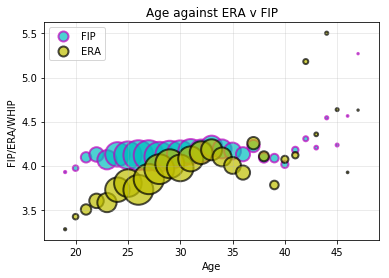

'FIP remains constant, which is surprising but ERA increases steadily between 26 and 33 (approx) to a near match of FIP.  Then a a drop off but the number of pitchers above this age begins to drop and ad 37 the results become scattered and difficult to find a correlation.'

In [8]:
fig, ax = plt.subplots()
#ax.scatter('Age', 'ERA', c='c',alpha=0.7, edgecolors='r', linewidths=2, data=pitchGrouped, label='ERA', s='ERA')
ax.scatter('Age','FIP', c='c',alpha=0.7, edgecolors='m', linewidths=2, data=pitchGrouped, label='FIP', s=pWeight)
ax.scatter('Age', 'ERA', c='y',alpha=0.7, edgecolors='k', linewidths=2, data=pitchGrouped, label='ERA', s=pWeight)
ax.set_title('Age against ERA v FIP')
ax.grid(alpha=0.3)
ax.set_ylabel('FIP/ERA/WHIP')
ax.set_xlabel('Age')
ax.set_xlim(ageMin, ageMax)
#ax.set_ylim(yMin, 5)
leg = plt.legend(loc='best', scatteryoffsets=[0.5])
for handle in leg.legendHandles:
    handle.set_sizes([100.0])
plt.show()
'''FIP remains constant, which is surprising but ERA increases steadily between 26 and 33 (approx) to a near match of FIP.  Then a a drop off but the number of pitchers above this age begins to drop and ad 37 the results become scattered and difficult to find a correlation.'''

In [9]:
eraFloor = (pitchGrouped['ERA'].min()-.02)
eraCeil = (pitchGrouped['ERA'].max()+.02)
fipFloor = (pitchGrouped['FIP'].min()-.02)
fipCeil = (pitchGrouped['FIP'].max()+.02)
whipFloor = (pitchGrouped['WHIP'].min()-.02)
whipCeil = (pitchGrouped['WHIP'].max()+.02)
kbbFloor = (pitchGrouped['K:BB/9IN'].min()-.02)
kbbCeil = (pitchGrouped['K:BB/9IN'].max()+.02)

C:\Users\goodmanclint\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


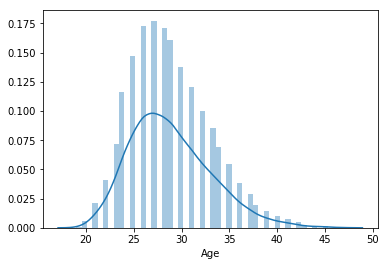

In [10]:
sns.distplot(pitchingStarters.Age, hist=True,)
plt.savefig('Pitching Output/AgeDistribution.png', type='png')

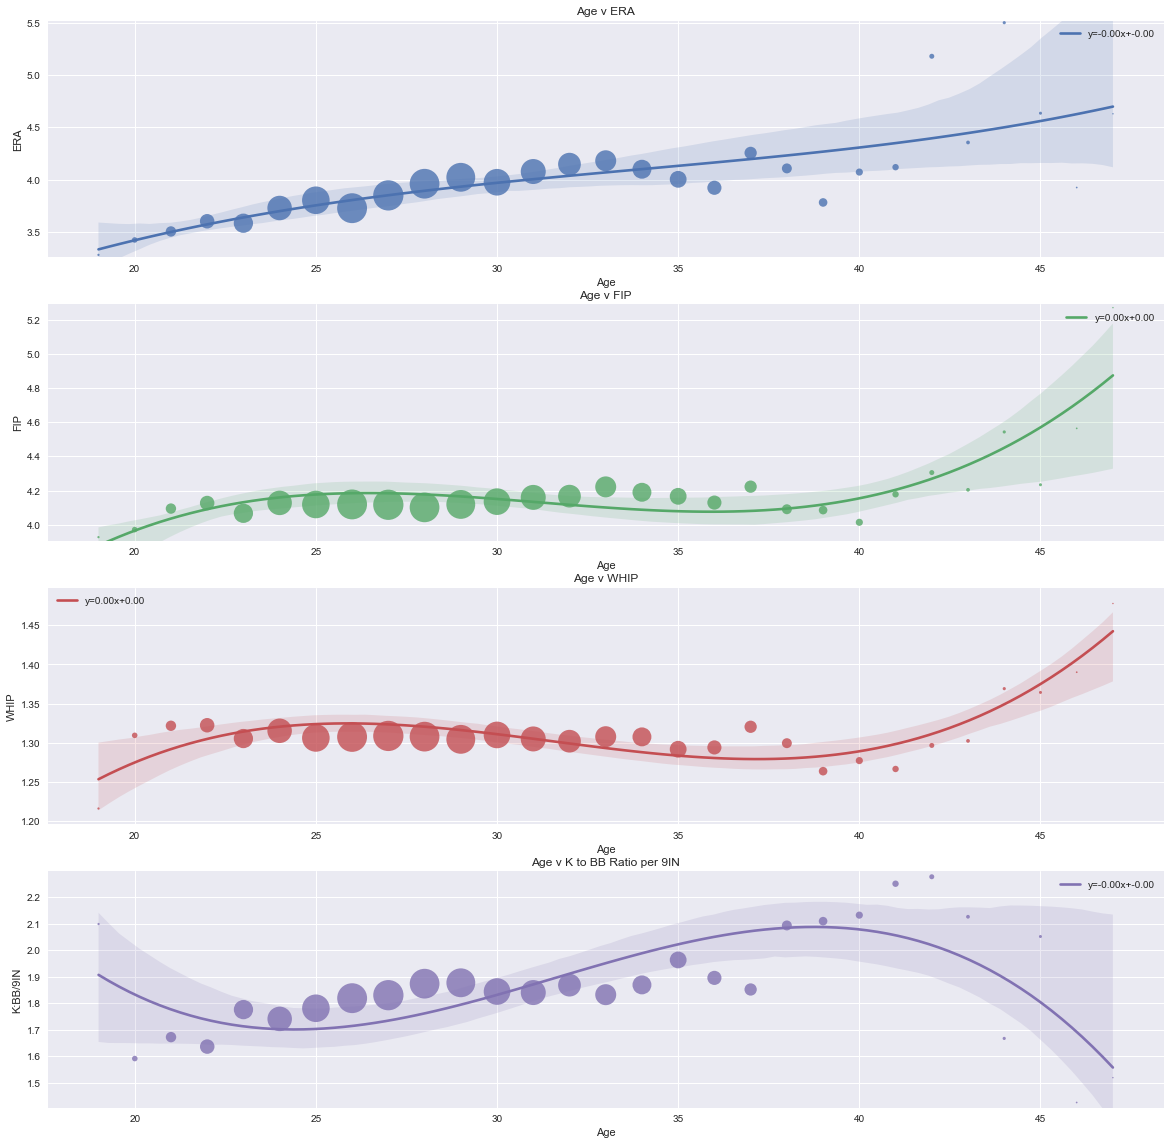

In [11]:
sns.set(color_codes=True)
fig, ax= plt.subplots(4, figsize=(20,20))
l = np.polyfit(pitchGrouped['Age'], pitchGrouped['ERA'], 2)
sns.regplot(x='Age',y='ERA', data=pitchGrouped, ax=ax[0],scatter_kws={"s":pWeight}, truncate=True, line_kws={'label': "y={0:.2f}x+{1:.2f}".format(l[0],l[0])}, order=3)
ax[0].legend()
i = np.polyfit(pitchGrouped['Age'], pitchGrouped['FIP'], 2)
sns.regplot(x='Age',y='FIP', data=pitchGrouped, ax=ax[1],scatter_kws={"s":pWeight},truncate=True, line_kws={'label': "y={0:.2f}x+{1:.2f}".format(i[0],i[0])}, order=3)
ax[1].legend()
j = np.polyfit(pitchGrouped['Age'], pitchGrouped['WHIP'], 2)
sns.regplot(x='Age',y='WHIP', data=pitchGrouped, ax=ax[2],scatter_kws={"s":pWeight}, truncate=True, line_kws={'label': "y={0:.2f}x+{1:.2f}".format(j[0],j[0])}, order=3)
ax[2].legend()
k = np.polyfit(pitchGrouped['Age'], pitchGrouped['K:BB/9IN'], 2)
sns.regplot(x='Age',y='K:BB/9IN', data=pitchGrouped, ax=ax[3],scatter_kws={"s":pWeight}, truncate=True, line_kws={'label': "y={0:.2f}x+{1:.2f}".format(k[0],k[0])}, order=3)
ax[3].legend()

ax[0].set(title='Age v ERA', ylim=(eraFloor, eraCeil))
ax[1].set(title='Age v FIP', ylim=(fipFloor, fipCeil))
ax[2].set(title='Age v WHIP', ylim=(whipFloor, whipCeil))
ax[3].set(title='Age v K to BB Ratio per 9IN', ylim=(kbbFloor, kbbCeil))

plt.savefig('Pitching Output/Pitching_Main.png')